/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 30, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ (None, 30, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 247,937 (968.50 KB)

 Trainable params: 247,937 (968.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - loss: 0.7549 - val_loss: 0.4973
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - loss: 0.7638 - val_loss: 0.4972
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.7513 - val_loss: 0.4955
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.7517 - val_loss: 0.4924
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.7497 - val_loss: 0.4968
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.7488 - val_loss: 0.4916
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.7494 - val_loss: 0.4833
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.7428 - val_loss: 0.4808
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - loss: 0.7420 - val_loss: 0.4830
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 0.7438 - val_loss: 0.4849
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 175ms/step - loss: 0.7451 - val_loss: 0.4758
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/ste

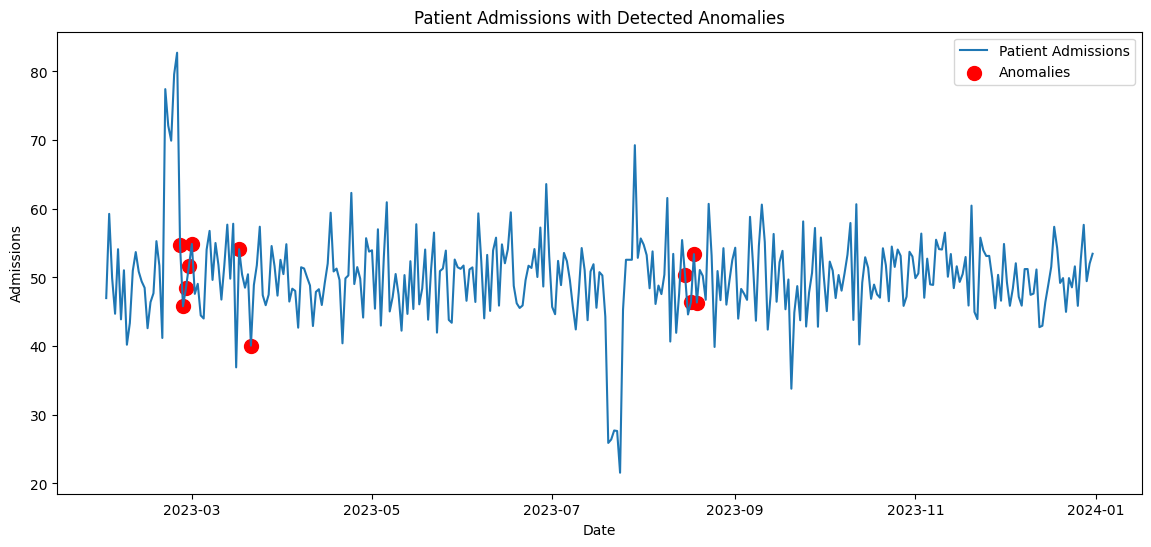

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, RepeatVector, TimeDistributed

# Step 1: Data Simulation
np.random.seed(42)
dates = pd.date_range("2023-01-01", periods=365, freq="D")
patient_admissions = np.random.normal(loc=50, scale=5, size=(365,))
# Introduce some anomalies
patient_admissions[50:55] = patient_admissions[50:55] * 1.5
patient_admissions[200:205] = patient_admissions[200:205] * 0.5

df = pd.DataFrame({"Date": dates, "Patient_Admissions": patient_admissions})
df.set_index("Date", inplace=True)

# Step 2: Data Preprocessing
scaler = StandardScaler()
df["Patient_Admissions_Scaled"] = scaler.fit_transform(df["Patient_Admissions"].values.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, time_steps=30):
    sequences, targets = [], []
    for i in range(len(data) - time_steps):
        sequences.append(data[i : i + time_steps])
        targets.append(data[i + time_steps])
    return np.array(sequences), np.array(targets)

time_steps = 30
X, y = create_sequences(df["Patient_Admissions_Scaled"].values, time_steps)

# Step 3: Enhanced Anomaly Detection Using an LSTM Autoencoder
model = Sequential([
    LSTM(128, input_shape=(time_steps, 1), return_sequences=True),
    Dropout(0.3),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    RepeatVector(time_steps),
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    TimeDistributed(Dense(1))
])

model.compile(optimizer="adam", loss="mae")
model.summary()

# Train the model with increased epochs
history = model.fit(X, X, epochs=50, batch_size=32, validation_split=0.1, shuffle=False)

# Step 4: Visualization and Interpretation
# Predict the values
X_pred = model.predict(X)

# Reshape X to match the shape of X_pred
X = X.reshape((X.shape[0], X.shape[1], 1))

# Calculate reconstruction error
reconstruction_error = np.mean(np.abs(X_pred - X), axis=1)

# Set a slightly adjusted threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 97)  # Top 3% as anomalies
df_anomaly = df[time_steps:].copy()

# Assign anomalies based on the threshold
df_anomaly["Anomaly"] = [1 if e > threshold else 0 for e in reconstruction_error]

# Step 5: Plot the results
plt.figure(figsize=(14, 6))

# Reshape the data to be 2D for inverse_transform
inverse_transformed_data = scaler.inverse_transform(df_anomaly["Patient_Admissions_Scaled"].values.reshape(-1, 1))

plt.plot(df_anomaly.index, inverse_transformed_data, label="Patient Admissions")

# Highlight anomalies directly on the time series
anomalies_index = df_anomaly[df_anomaly["Anomaly"] == 1].index
anomalies_values = df_anomaly[df_anomaly["Anomaly"] == 1]["Patient_Admissions_Scaled"]

# Reshape anomalies_values for inverse_transform
anomalies_values_transformed = scaler.inverse_transform(anomalies_values.values.reshape(-1, 1))

plt.scatter(anomalies_index, anomalies_values_transformed, color="red", label="Anomalies", marker='o', s=100)

plt.title("Patient Admissions with Detected Anomalies")
plt.xlabel("Date")
plt.ylabel("Admissions")
plt.legend()
plt.show()
